# Decision Trees

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.patches as mpatches

## 1. Importando dataset

In [2]:
dataset = pd.read_csv('eda/dataset.csv')
dataset.head()

,age,default,balance,housing,loan,day,month,campaign,pdays,previous,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2143,1,0,5,5,1,-1,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,1,-1,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,5,5,1,-1,0,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,5,1,-1,0,...,0,1,0,0,0,0,1,0,0,1
4,33,0,1,0,0,5,5,1,-1,0,...,0,0,1,0,0,0,1,0,0,1


## 2. Preparando dataset

1. Remover atributo target do dataset X (usando drop) 
2. Obter coluna target do dataset
3. Separar dados de treino de dados de teste (nesse caso 77% para treino e 33% para teste)

In [3]:
X = dataset.drop('aceitaram',axis=1)
y = dataset['aceitaram']
X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.33,random_state=42)

## 3. Criando modelo
1. Definir o método de aprendizagem (árvore de decisões)
2. Definir hiperparâmetros (inicialmente default)
3. "Ajustar" modelo (.fit) com os dados de treino

In [4]:
clf = tree.DecisionTreeClassifier(random_state=33)
clf = clf.fit(X_train, y_train)

## 4. Testando modelo
1. Com o modelo criado, a partir dos dados de treino, pode-se testar o modelo com os dados de teste
2. Aplicando os dados de teste é possível verificar o desempenho do modelo
    * **precision**: A precisão é a capacidade de um classificador de não rotular uma instância positiva que seja realmente negativa."Para todas as instâncias classificadas como positivas, qual porcentagem estava correta?"  **precision = tp/(tp+fp)**
    * **recall**: É a capacidade de um classificador para encontrar todas as instâncias positivas. Para cada classe, é definida como a proporção de verdadeiros positivos para a soma de verdadeiros positivos e falsos negativos. "Para todas as instâncias que foram realmente positivas, qual porcentagem foi classificada corretamente?" **recall = tp/(tp+fn)**
    * **f1-score**: É uma média harmônica ponderada de _precision_ e _recall_ de tal forma que o melhor escore é 1,0 e o pior é 0,0. De um modo geral, as pontuações F1 são inferiores às medidas de precisão.
    * **support**:Suporte é o número de ocorrências reais da classe no conjunto de dados especificado. 
3. Verificando desempenho:
    * **precision**: Para a classe de obervações sim, o classificador obteve uma precisão de 91%. Para a classe de pessoas que responderam não, o classificador obteve uma precisão de 29%. O total de observações de teste que disseram não está em torno de 88% enquanto os que aceitaram, disseram sim, é de apenas 12%. O Resultado da precisão do modelo, sem nenhuma variação de parâmetros, ou seja, com os parâmetros default do modelo é de 83%. Em outras palavras quando o modelo prevê que uma observação será aceita, o modelo estará certo 29% das vezes, por outro lado quando o modelo prevê que uma observação será recusada ele está certo 91% das vezes.
    * **recall**: De todas as observações que tiveram predição dita como "Aceita" 32% foram mesmo aceitas, da mesma forma, das observações que tiverão predição como "Recusada" 89% foram mesmo recusadas. Resultando em 82% do total realmente era o que foi predita pelo modelo. Dessa forma, identifica 89% das vezes que a observação será recusada(de todas as observações recusadas) e 32% quando serão aceitas(de todas as observações aceitas)
    
**_Observações_**

Para avaliar completamente a eficácia de um modelo, você deve examinar a precisão e a recuperação. Infelizmente, a precisão e a recordação estão frequentemente em tensão. Ou seja, melhorar a precisão normalmente reduz o recall e vice-versa.

In [5]:
y_predict = clf.predict(X_test)
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Accept', 'Predicted Accept'],
    index=['True Not Accept', 'True Accept']
)

,Predicted Not Accept,Predicted Accept
True Not Accept,11712,1422
True Accept,1213,573


In [6]:
print(classification_report(y_test, y_predict,target_names=['Recusaram','Aceitaram']))
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

   Recusaram       0.91      0.89      0.90     13134
   Aceitaram       0.29      0.32      0.30      1786

   micro avg       0.82      0.82      0.82     14920
   macro avg       0.60      0.61      0.60     14920
weighted avg       0.83      0.82      0.83     14920

0.8233914209115282


## 5. Exibindo Árvore de Decisões
1. Exibir árvore a partir de graphviz. **_É necessário a instalação do pacote graphviz_**:
> sudo apt-get install graphviz

In [7]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.values.tolist(),  
                         class_names=['Não', 'Sim'],  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data)

In [8]:
# graph

## 6. Variando hiperparâmetros
1. Variação de parâmetros:
    * **criterion**: Pode ser "gini", para impurezas Gini, e "entropy", para ganho de informação.
    * **min_samples_leaf**: Indica o mínimo de objetos requeridos em um nó folha.
    * **min_samples_split**: Indica o número mínimo de objetos necessários para dividir um nó interno.
    * **max_depth**: Controla a profundidade máxima da árvore, se "None" aumentará a árvore até que todas as folhas fiquem puras ou até que todas as folhas contenham menos de min_samples_split.

In [9]:
clf = tree.DecisionTreeClassifier(criterion='gini',
                                  min_samples_leaf=3,
                                  min_samples_split=12,
                                  max_depth=None)
clf = clf.fit(X_train, y_train)

## 7. Verificando desempenho com hiperparâmetros modificados
    
   * **precision**: Com a mudança dos parâmetros min_samples_leaf(1 para 3) e min_samples_split(2 para 12), é possível perceber um ganho de 10%(de 29% para 39%) da precisão dos que aceitaram . Portanto, quando o modelo prevê que a observação será aceita ele estará certo 39% das vezes. No agregado o valor aumentou 1% sua precisão.  
   * **recall**: Em contrapartida, o recall das observações aceitas diminuiu 4%(de 32% para 28%) e do número que de recusas aumentou 5%(de 89% para 94%). Ou seja, de todas as observações recusadas o modelo reconhece 94% e de todas as que serão aceitas o modelo reconhece 28%. No agregado o modelo também aumentou o recall em 4%. 

In [10]:

y_predict = clf.predict(X_test)
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Accept', 'Predicted Accept'],
    index=['True Not Accept', 'True Accept']
)

,Predicted Not Accept,Predicted Accept
True Not Accept,12339,795
True Accept,1280,506


In [11]:
print(classification_report(y_test, y_predict,target_names=['Recusaram','Aceitaram']))

              precision    recall  f1-score   support

   Recusaram       0.91      0.94      0.92     13134
   Aceitaram       0.39      0.28      0.33      1786

   micro avg       0.86      0.86      0.86     14920
   macro avg       0.65      0.61      0.63     14920
weighted avg       0.84      0.86      0.85     14920



## 8. Verificar resultador por variação de nós mínimos por folha e nós mínimos requeridos para divisão

Observa-se que, com a variação do número de amostras para se estar na folha e o número de amostras para divisão, os valores _precision_ e _recall_ variam, e como afirmado anteriormente as duas medidas, são, de certa forma inversamente proporcionais. Assim, sendo necessário ponderar as duas medidas é muito importante. 

Para 1, como número mínimo para as folhas


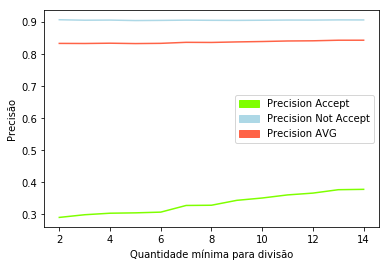

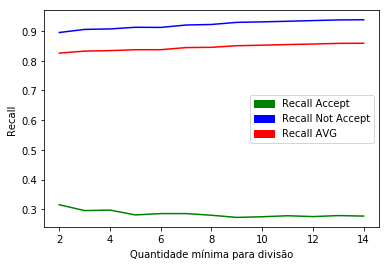

Para 2, como número mínimo para as folhas


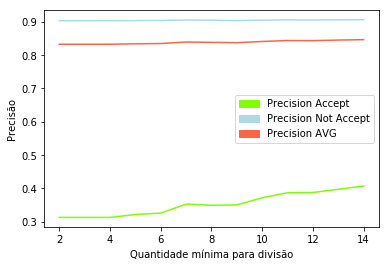

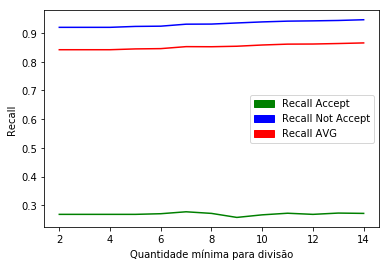

Para 3, como número mínimo para as folhas


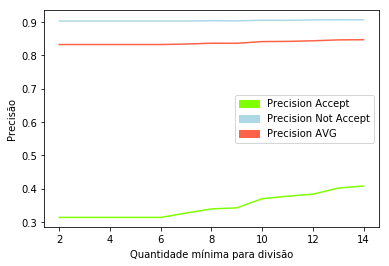

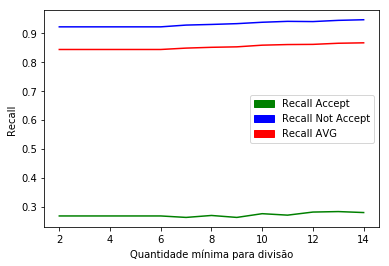

Para 4, como número mínimo para as folhas


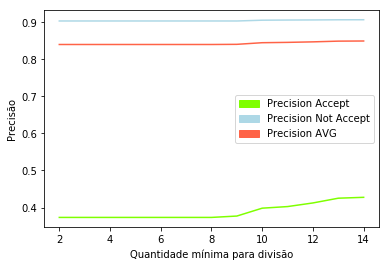

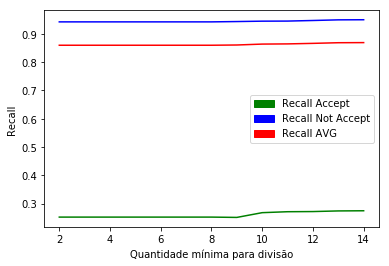

Para 5, como número mínimo para as folhas


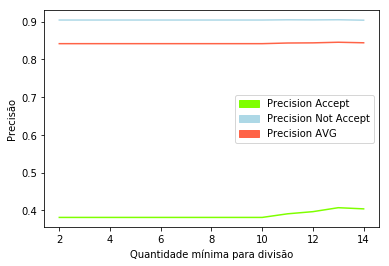

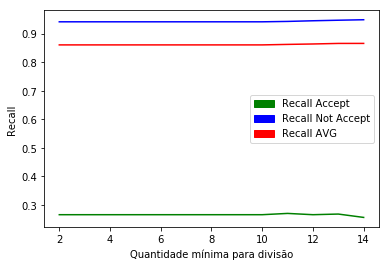

Para 6, como número mínimo para as folhas


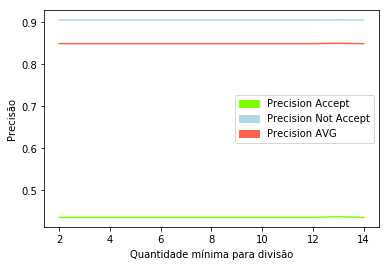

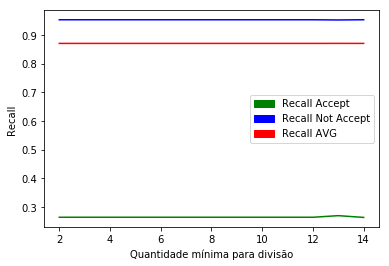

Para 7, como número mínimo para as folhas


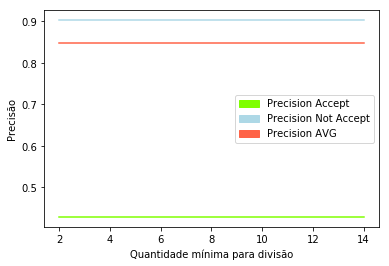

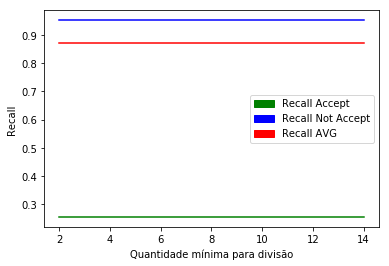

Para 8, como número mínimo para as folhas


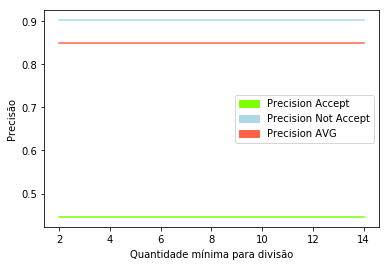

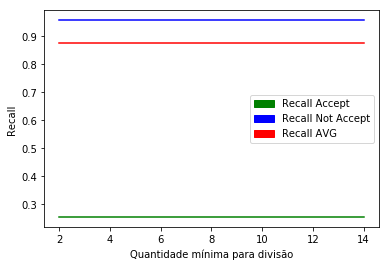

Para 9, como número mínimo para as folhas


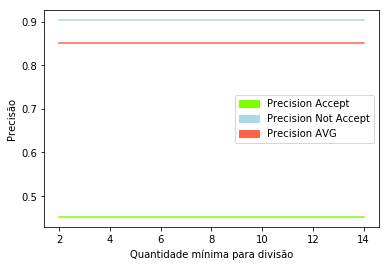

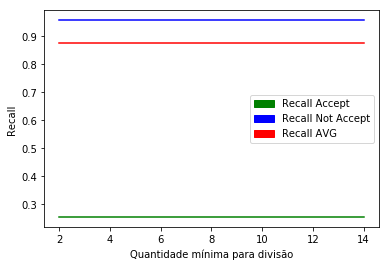

Para 10, como número mínimo para as folhas


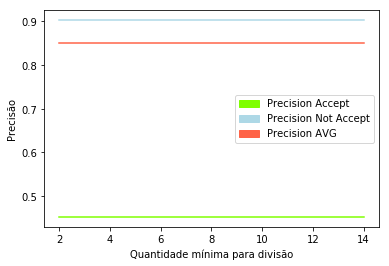

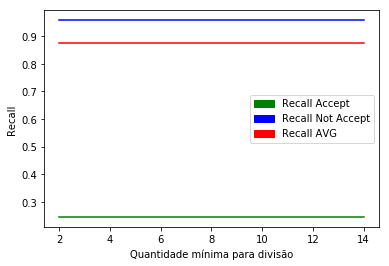

Para 11, como número mínimo para as folhas


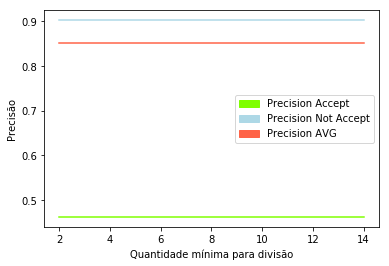

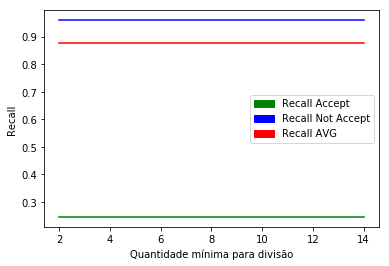

Para 12, como número mínimo para as folhas


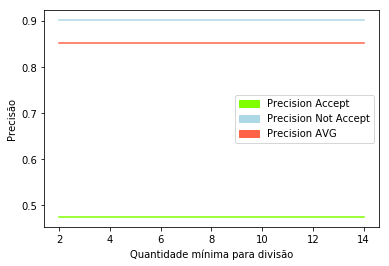

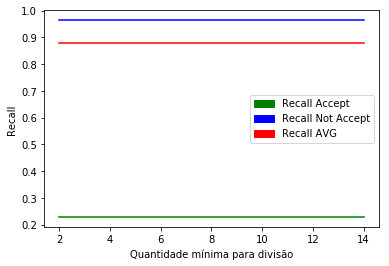

Para 13, como número mínimo para as folhas


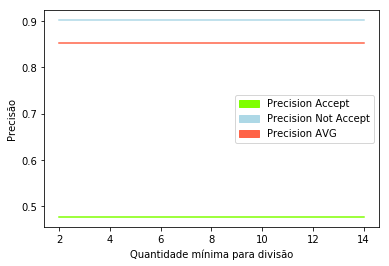

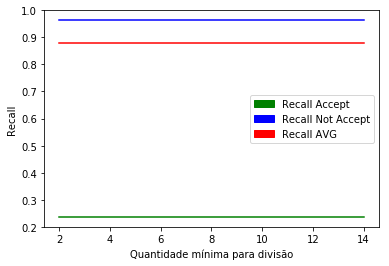

Para 14, como número mínimo para as folhas


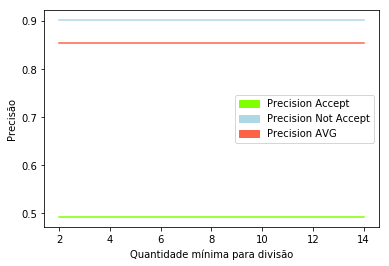

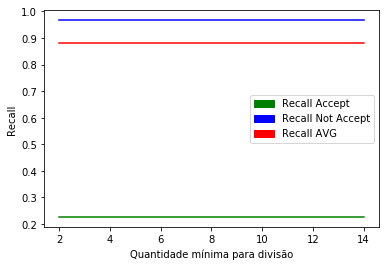

In [12]:
for samples_leaf in range(1, 15):
    report_precision_not_accept = []
    report_recall_not_accept = []

    report_precision_accept = []
    report_recall_accept = []

    report_precision_avg = []
    report_recall_avg = []
    for samples_split in range(2, 15):
        clf = tree.DecisionTreeClassifier(criterion='gini',
                                      min_samples_leaf=samples_leaf,
                                      min_samples_split=samples_split,
                                      max_depth=30,
                                      random_state=32)
        clf = clf.fit(X_train, y_train) 
        y_predict = clf.predict(X_test)
        report = classification_report(y_test, y_predict, output_dict=True, target_names=['Recusaram','Aceitaram'])
        report_precision_not_accept.append(report['Recusaram']['precision'])
        report_recall_not_accept.append(report['Recusaram']['recall'])
        report_precision_accept.append(report['Aceitaram']['precision'])
        report_recall_accept.append(report['Aceitaram']['recall'])
        report_precision_avg.append(report['weighted avg']['precision'])
        report_recall_avg.append(report['weighted avg']['recall'])
        
    max_samples = range(2, 15)
    print("Para {}, como número mínimo para as folhas".format(samples_leaf))
    
    plt.plot(max_samples, report_precision_accept, 'chartreuse', label='Precision Accept')

    plt.plot(max_samples, report_precision_not_accept, 'lightblue', label='Precision Not Accept')

    plt.plot(max_samples, report_precision_avg, 'tomato', label='Precision AVG')

    plt.ylabel('Precisão')
    plt.xlabel('Quantidade mínima para divisão')
    
    plt.legend(handles=[mpatches.Patch(color='chartreuse', label='Precision Accept'),
    mpatches.Patch(color='lightblue', label='Precision Not Accept'),
    mpatches.Patch(color='tomato', label='Precision AVG')])

    plt.show()

    plt.plot(max_samples, report_recall_accept, 'green', label='Recall Accept')

    plt.plot(max_samples, report_recall_not_accept, 'blue', label='Recall Not Accept')

    plt.plot(max_samples, report_recall_avg, 'red', label='Recall AVG')

    plt.ylabel('Recall')
    plt.xlabel('Quantidade mínima para divisão')

    plt.legend(handles=[mpatches.Patch(color='green', label='Recall Accept'),
    mpatches.Patch(color='blue', label='Recall Not Accept'),
    mpatches.Patch(color='red', label='Recall AVG')])
    plt.show()

## 9.Verificar resultados por profundidade da árvore

Com a variação da profundidade máxima da árvore é possível observar um aumento gradativo do recall dos que recusaram quanto maior a profundidade que é inversamente proporcional ao recall dos que não aceitaram e da média, visto que essa última é composta por uma peso maior do recall dos que recusaram. Em relação a precisão é claro um pico no início para os que aceitaram que vai regredindo até se estabilizar, dos recusados tem-se uma constância em grande parte do segmento.

/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


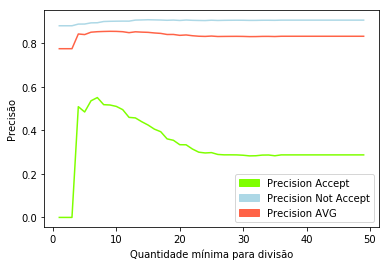

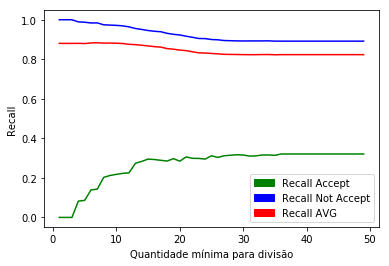

In [13]:
report_precision_not_accept = []
report_recall_not_accept = []

report_precision_accept = []
report_recall_accept = []

report_precision_avg = []
report_recall_avg = []

for max_depth in range(1, 50):
    clf = tree.DecisionTreeClassifier(criterion='gini',
                                  max_depth=max_depth,
                                     random_state=33)
    clf = clf.fit(X_train, y_train) 
    y_predict = clf.predict(X_test)
    report = classification_report(y_test, y_predict, output_dict=True, target_names=['Recusaram','Aceitaram'])
    report_precision_not_accept.append(report['Recusaram']['precision'])
    report_recall_not_accept.append(report['Recusaram']['recall'])
    report_precision_accept.append(report['Aceitaram']['precision'])
    report_recall_accept.append(report['Aceitaram']['recall'])
    report_precision_avg.append(report['weighted avg']['precision'])
    report_recall_avg.append(report['weighted avg']['recall'])
    

max_samples = range(1, 50)
plt.plot(max_samples, report_precision_accept, 'chartreuse', label='Precision Accept')

plt.plot(max_samples, report_precision_not_accept, 'lightblue', label='Precision Not Accept')

plt.plot(max_samples, report_precision_avg, 'tomato', label='Precision AVG')

plt.ylabel('Precisão')
plt.xlabel('Quantidade mínima para divisão')

plt.legend(handles=[mpatches.Patch(color='chartreuse', label='Precision Accept'),
mpatches.Patch(color='lightblue', label='Precision Not Accept'),
mpatches.Patch(color='tomato', label='Precision AVG')])

plt.show()

plt.plot(max_samples, report_recall_accept, 'green', label='Recall Accept')

plt.plot(max_samples, report_recall_not_accept, 'blue', label='Recall Not Accept')

plt.plot(max_samples, report_recall_avg, 'red', label='Recall AVG')

plt.ylabel('Recall')
plt.xlabel('Quantidade mínima para divisão')

plt.legend(handles=[mpatches.Patch(color='green', label='Recall Accept'),
mpatches.Patch(color='blue', label='Recall Not Accept'),
mpatches.Patch(color='red', label='Recall AVG')])
plt.show()

In [15]:
clf = tree.DecisionTreeClassifier(criterion='gini',
                                      min_samples_leaf=3,
                                      min_samples_split=12,
                                      max_depth=12,
                                      random_state=33)
clf = clf.fit(X_train, y_train) 
y_predict = clf.predict(X_test)


print(classification_report(y_test, y_predict,target_names=['Recusaram','Aceitaram']))

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Accept', 'Predicted Accept'],
    index=['True Not Accept', 'True Accept']
)

              precision    recall  f1-score   support

   Recusaram       0.90      0.97      0.93     13134
   Aceitaram       0.47      0.22      0.30      1786

   micro avg       0.88      0.88      0.88     14920
   macro avg       0.69      0.59      0.62     14920
weighted avg       0.85      0.88      0.86     14920



,Predicted Not Accept,Predicted Accept
True Not Accept,12695,439
True Accept,1389,397
